## Week4 Vision


### 문제 1

1-stage-detector와 2-stage-detector의 차이를 설명해주세요.


2-stage-detector는 객체의 위치를 찾는 과정인 Regional Proposal과 객체를 분류하는 과정인 Classification이 순차적으로 이루어지는 반면, 1-stage-detector는 Regional Proposal과 Classification이 동시에 이루어진다. 따라서 전자의 경우 인식률은 높으나 시간 성능이 떨어진다는 특징이 있는 반면, 후자의 경우 인식률은 떨어지나 시간 성능이 우수하다는 특징이 있다.

### 문제 2
IoU(Intersection over Union) 기반 객체 탐지 평가

아래 코드의 빈칸을 완성시켜 실행해주세요.

In [3]:
import numpy as np

def calculate_iou(box1, box2):
    """
    두 개의 바운딩 박스를 입력받아 IoU(Intersection over Union)를 계산하는 함수
    box1, box2는 (x1, y1, x2, y2) 형식
    """
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    # 교차 영역 (Intersection) 계산
    xi1, yi1 = max(x1, x1g), max(y1, y1g)
    xi2, yi2 = min(x2, x2g), min(y2,y2g )
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

    # 각 바운딩 박스의 면적 계산
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)
    union_area = box1_area + box2_area - inter_area

    # IoU 계산
    return inter_area / union_area if union_area > 0 else 0

# 테스트 바운딩 박스
box_pred = [50, 50, 150, 150]  # 예측 박스
box_true = [60, 60, 140, 140]  # 실제 정답 박스

# IoU 계산
iou = calculate_iou(box_pred, box_true)
print(f"IoU: {iou:.4f}")

# IoU 임계값(0.5) 기준으로 TP/FP 판별
threshold = 0.5
if iou >= threshold:
    print("탐지 성공 (True Positive)")
else:
    print("탐지 실패 (False Positive)")


IoU: 0.6400
탐지 성공 (True Positive)


### 문제 3
Hugging Face에서 모델을 불러와 yolov8을 사용해보는 과제입니다.

아래 코드의 빈칸을 완성시켜 실행해주세요.

런타임을 T4로 바꾸고 실행해주세요!!

In [4]:
!pip install -q ultralytics transformers torch torchvision opencv-python matplotlib

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 179, in resolve
    self.factory.preparer.prepare_linked_requirements_more(reqs)
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/prepare.py", line 554, in prepare_linked_requirements_more
    self._complete_partial_requirements(
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/pr

In [7]:
pip install ultralytics

  Using cached ultralytics-8.3.92-py3-none-any.whl.metadata (35 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.m

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


YOLOv8 model loaded on cuda

0: 384x640 2 persons, 1 tie, 48.2ms
Speed: 10.1ms preprocess, 48.2ms inference, 327.8ms postprocess per image at shape (1, 3, 384, 640)


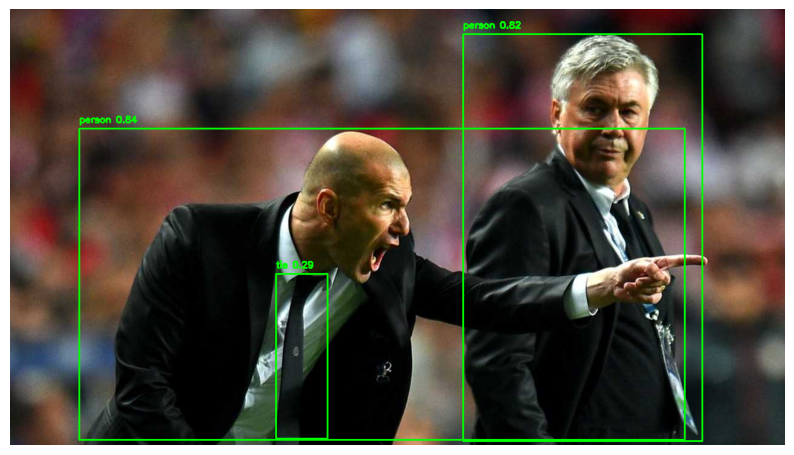

In [1]:
import torch
import cv2
import requests
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from huggingface_hub import hf_hub_download

# CUDA 사용 여부 확인
device = "cuda" if torch.cuda.is_available() else "cpu"

# Hugging Face에서 YOLOv8 모델 다운로드
model_repo = "ultralytics/yolov8"
model_filename = "yolov8n.pt"

# 모델을 Hugging Face Hub에서 다운로드하여 저장
model_path = hf_hub_download(repo_id=model_repo, filename=model_filename)

# YOLOv8 모델 로드
model = YOLO(model_path).to(device)
print(f"YOLOv8 model loaded on {device}")

# 테스트 이미지 다운로드
image_path = "test.jpg"
image_url = "https://ultralytics.com/images/zidane.jpg"

if not os.path.exists(image_path):
    print("Downloading test image...")
    response = requests.get(image_url, stream=True)
    if response.status_code == 200:
        with open(image_path, "wb") as file:
            file.write(response.content)
        print("Test image downloaded successfully!")
    else:
        raise Exception("Failed to download test image.")

# 이미지 로드 및 변환
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR을 사용하므로 RGB 변환

# YOLOv8 객체 탐지 수행
results = model(image)

# 탐지 결과 시각화
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 바운딩 박스 좌표
        conf = box.conf[0]  # 신뢰도
        cls = int(box.cls[0])  # 클래스 인덱스

        # 클래스 이름 가져오기
        class_name = model.names[cls]

        # 바운딩 박스 그리기
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_rgb, f"{class_name} {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# 결과 출력
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()
